In [ ]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing all datasets
churn_data = pd.read_csv("/content/drive/MyDrive/upgrad/churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
customer_data = pd.read_csv("/content/drive/MyDrive/upgrad/customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
internet_data = pd.read_csv("/content/drive/MyDrive/upgrad/internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [ ]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')


In [ ]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

In [ ]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [ ]:
telecom.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [ ]:
telecom['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

In [ ]:
len(telecom[telecom['TotalCharges']==' ']) # whitespaces

0

10 rows ---  8th 9th r whitespace

mean ---8 rows ---> float and calcualte mean

In [ ]:
mean = telecom[telecom['TotalCharges']!=' ']['TotalCharges'].astype(float).mean()
mean

2283.300440841866

In [ ]:
telecom['TotalCharges'].replace(" ",mean,inplace = True)

In [ ]:
telecom['TotalCharges'] = telecom['TotalCharges'].astype(float)

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

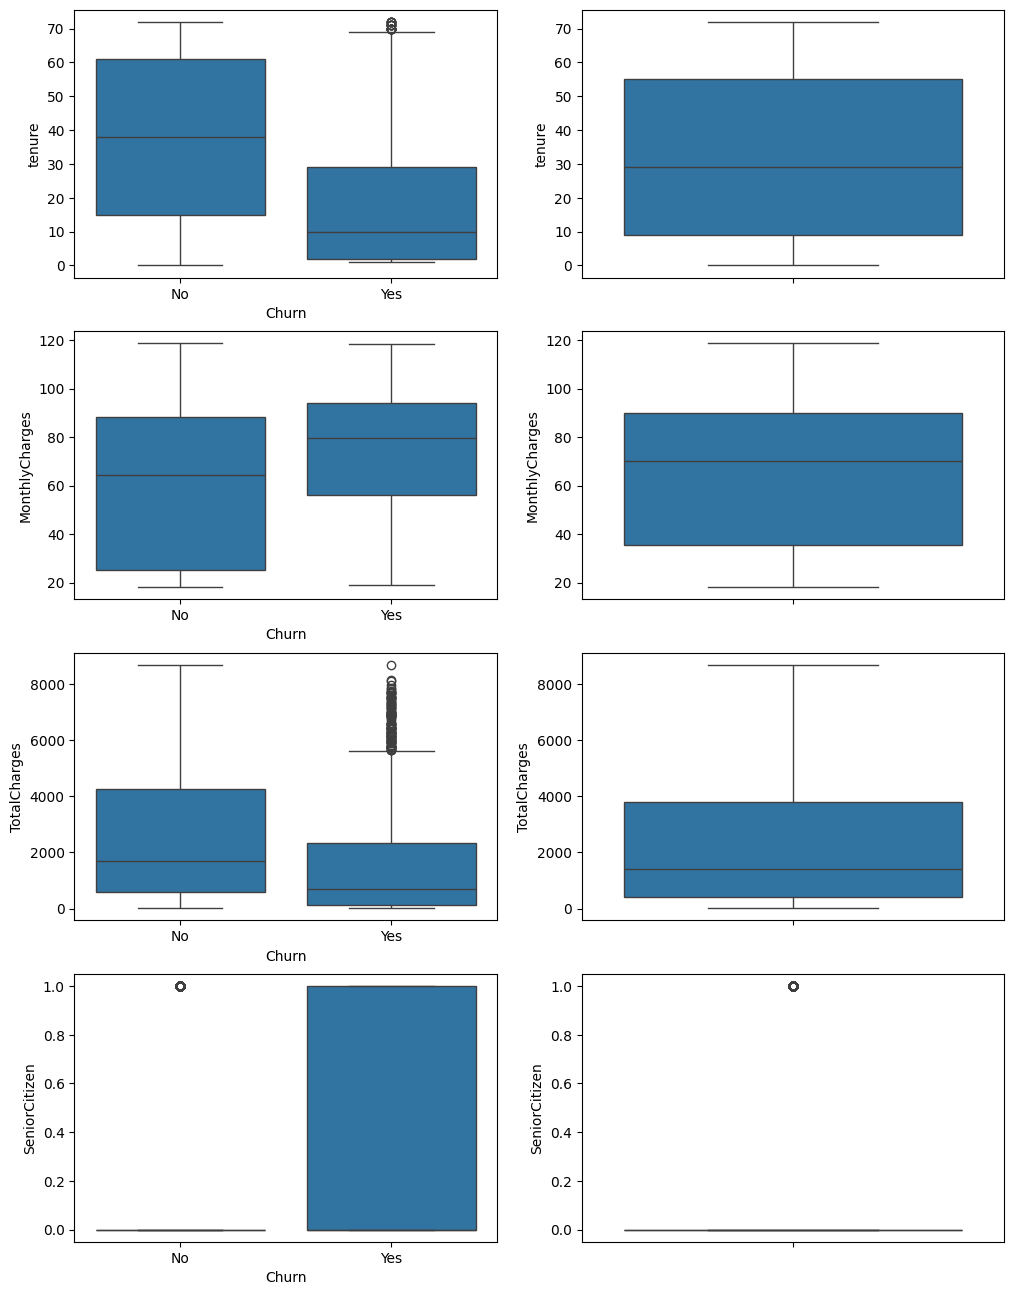

In [ ]:
num_features =[features for features in telecom.columns if telecom[features].dtypes != "O"]
rows =len(num_features)
fig, ax = plt.subplots(nrows=rows, ncols=2, figsize=(12,16));
i = 0
for features in num_features:

    s=sns.boxplot(x = telecom['Churn'], y = telecom[features],ax = ax[i,0])
    s=sns.boxplot(y = telecom[features],ax = ax[i,1])
    i = i +1

In [ ]:
telecom['SeniorCitizen'].value_counts() # category

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
features = [features for features in telecom.columns if telecom[features].dtypes != "O"]
nam =  features
for features in nam:
    q25 = telecom[features].quantile(0.25)
    q75 = telecom[features].quantile(0.75)
    iqr = q75 - q25
    ul = q75 + 1.5*iqr
    ll = q25 - 1.5*iqr
    outliers = [i for i in telecom[features] if i > ul or i < ll]
    print('No.of {} outliers is {}'.format(features, len(outliers)))
    print('\n')

    mean = int(telecom[features].mean())
    telecom[features] = np.where(telecom[features] < ll,mean, telecom[features])
    telecom[features] = np.where(telecom[features] > ul,mean, telecom[features])
    outliers = [i for i in telecom[features] if i > ul or i < ll]
    print('No.of {} outliers after is {}'.format(features, len(outliers)))
    print('\n')


No.of tenure outliers is 0


No.of tenure outliers after is 0


No.of MonthlyCharges outliers is 0


No.of MonthlyCharges outliers after is 0


No.of TotalCharges outliers is 0


No.of TotalCharges outliers after is 0


No.of SeniorCitizen outliers is 1142


No.of SeniorCitizen outliers after is 0




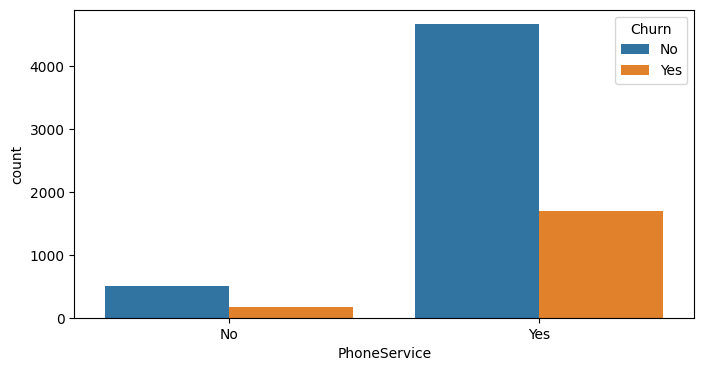

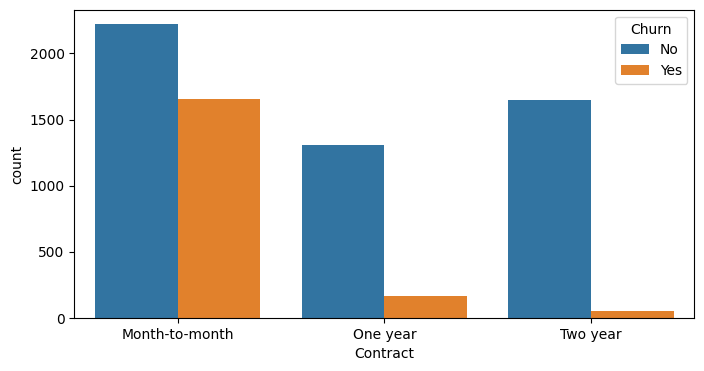

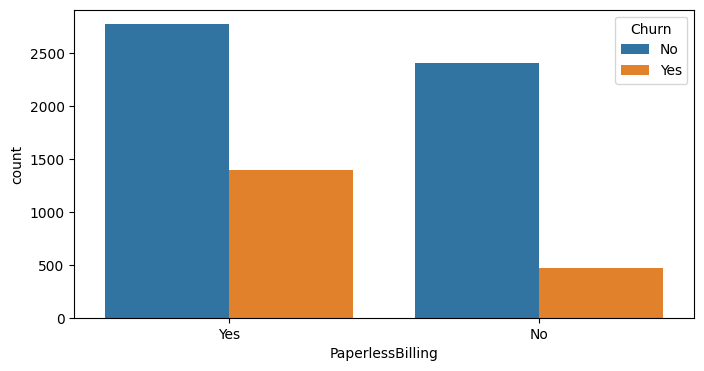

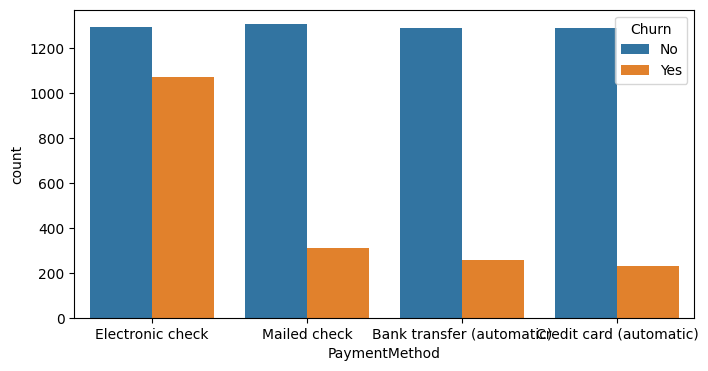

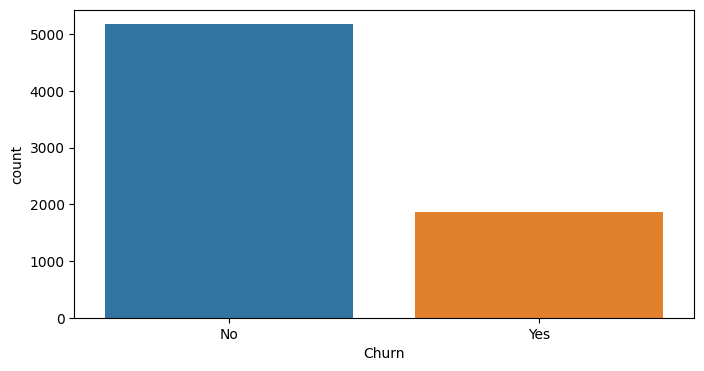

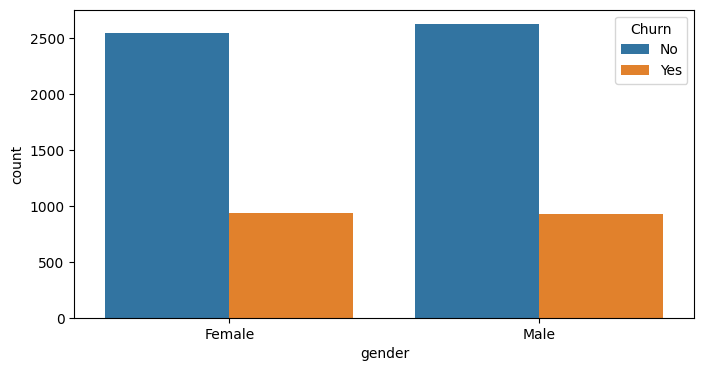

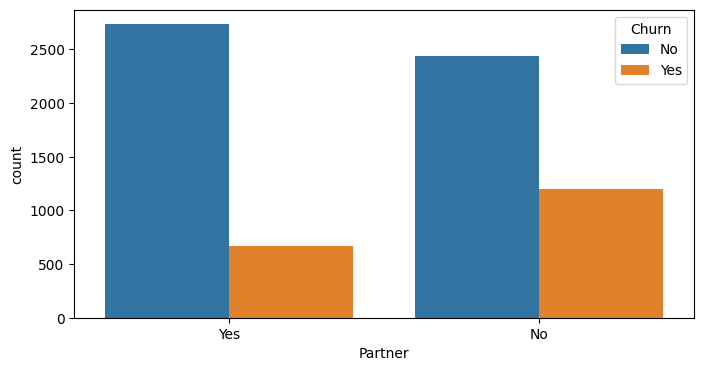

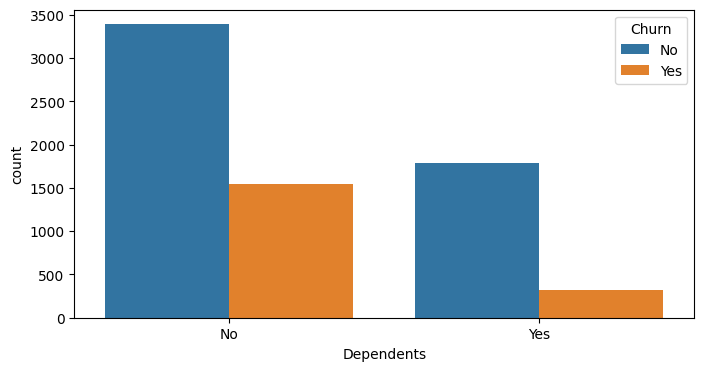

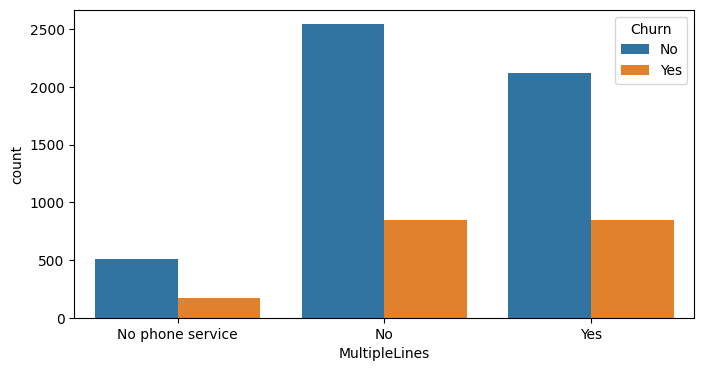

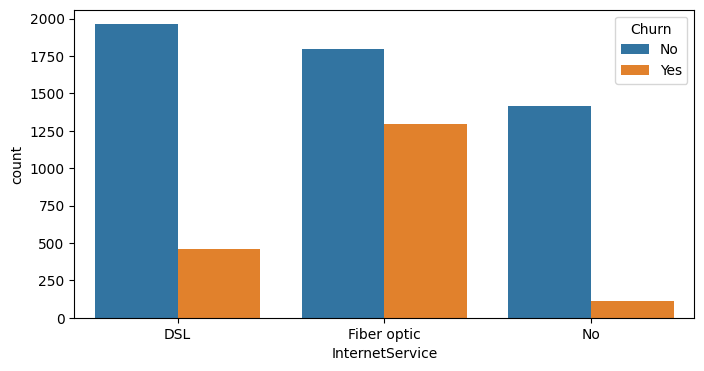

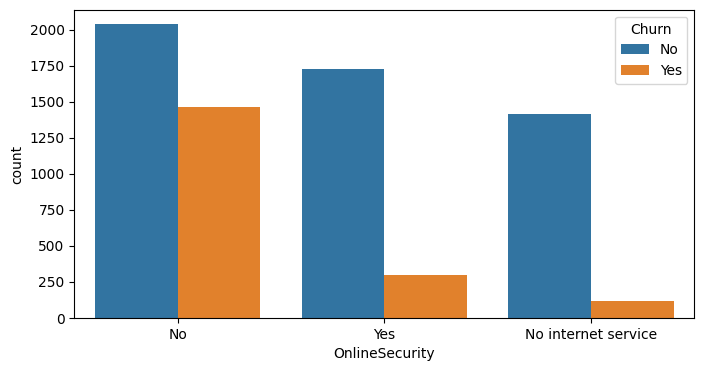

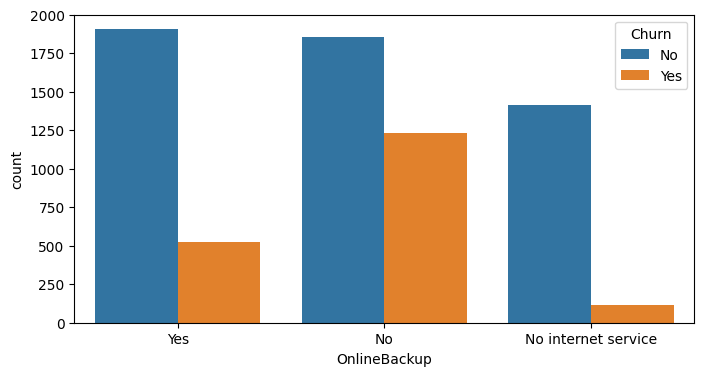

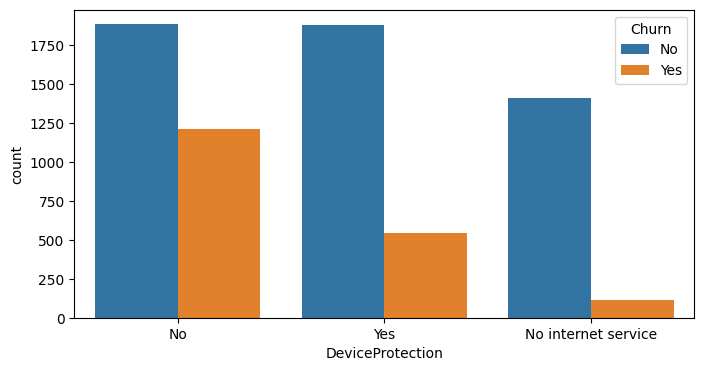

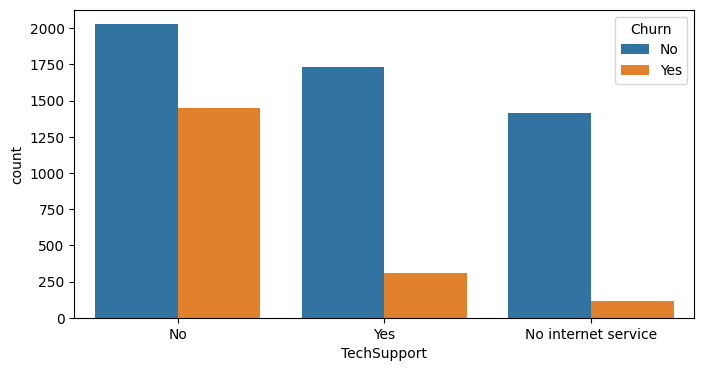

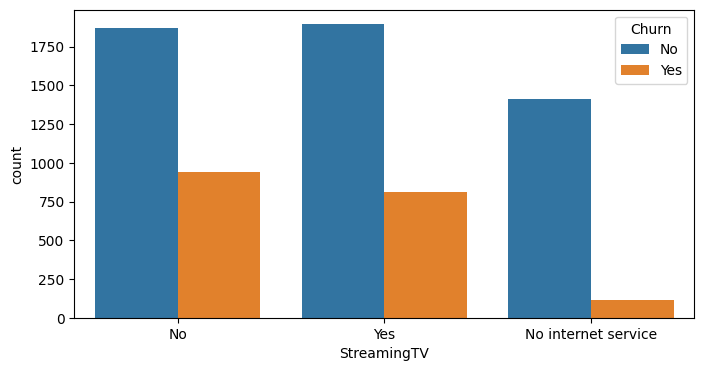

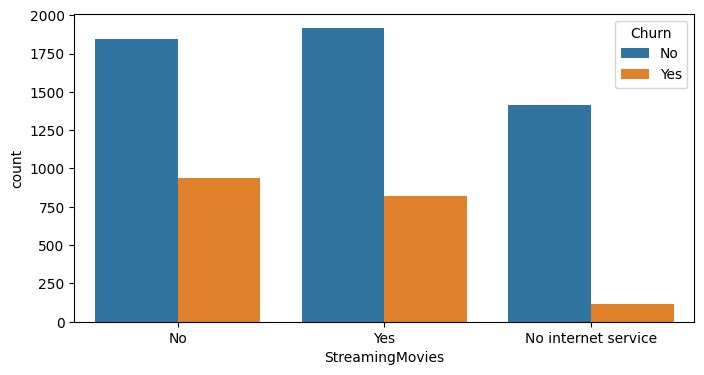

In [ ]:
features = [features for features in telecom.iloc[:,1:].columns if telecom[features].dtypes == "O"]
rows =len(features)
for features in features:
    plt.figure(figsize = (8,4))
    sns.countplot(x=features ,hue='Churn',data=telecom)

    plt.show()

<Axes: >

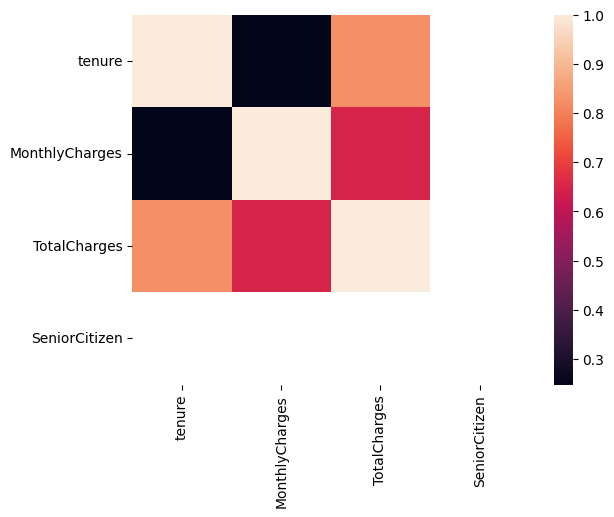

In [ ]:
sns.heatmap(telecom[num_features].corr())

In [ ]:
telecom['Partner'].value_counts() # should i go with OE

No     3641
Yes    3402
Name: Partner, dtype: int64

In [ ]:
telecom['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
# List of binary variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   Churn             7043 non-null   int64  
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   int64  
 12  Dependents        7043 non-null   int64  
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [ ]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [ ]:
telecom['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [ ]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'.
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'.
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'.
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [ ]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [ ]:
telecom = telecom.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)

In [ ]:
X = telecom.drop(['Churn','customerID'], axis=1)
y = telecom['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
y_train

877     0
5792    1
5334    1
878     0
6578    0
       ..
79      0
3927    1
5955    0
6936    1
5640    1
Name: Churn, Length: 4930, dtype: int64

In [ ]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2012.7
Date:                Sun, 03 Mar 2024   Deviance:                       4025.5
Time:                        15:37:02   Pearson chi2:                 5.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2871
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.4309      0.988      1.449      0.147      -0.505       3.367
tenure                                   -0.0524      0.007     -7.419      0.000      -0.066      -0.039
PhoneService                              0.3596      0.784      0.458      0.647      -1.178       1.897
PaperlessBilling                          0.3528      0.090      3.917      0.000       0.176       0.529
MonthlyCharges                           -0.0491      0.038     -1.277      0.202      -0.124       0.026
TotalCharges                              0.0003   8.18e-05      3.065      0.002    9.04e-05       0.000
SeniorCitizen                          4.743e-15   3.23e-15      1.467      0.142   -1.59e-15    1.11e-14
Partner                                   0.0578      0.093      0.620      0.535      -0.125       0.240
Dependents                               -0.2816      0.106     -2.661      0.008      -0.489      -0.074
Contract_One year                        -0.3529      0.064     -5.475      0.000      -0.479      -0.227
Contract_Two year                        -0.6969      0.103     -6.740      0.000      -0.900      -0.494
PaymentMethod_Credit card (automatic)    -0.0759      0.069     -1.100      0.271      -0.211       0.059
PaymentMethod_Electronic check            0.1423      0.057      2.498      0.013       0.031       0.254
PaymentMethod_Mailed check               -0.0457      0.069     -0.660      0.510      -0.182       0.090
gender_Male                              -0.0207      0.039     -0.529      0.597      -0.097       0.056
InternetService_Fiber optic               1.0082      0.483      2.088      0.037       0.062       1.954
InternetService_No                       -1.0731      0.488     -2.200      0.028      -2.029      -0.117
Contract_One year                        -0.3529      0.064     -5.475      0.000      -0.479      -0.227
Contract_Two year                        -0.6969      0.103     -6.740      0.000      -0.900      -0.494
PaymentMethod_Credit card (automatic)    -0.0759      0.069     -1.100      0.271      -0.211       0.059
PaymentMethod_Electronic check            0.1423      0.057      2.498      0.013       0.031       0.254
PaymentMethod_Mailed check               -0.0457      0.069     -0.660      0.510      -0.182       0.090
gender_Male                              -0.0207      0.039     -0.529      0.597      -0.097       0.056
InternetService_Fiber optic               1.0082      0.483      2.088      0.037       0.062       1.954
InternetService_No                       -1.0731      0.488     -2.200      0.028      -2.029      -0.117
MultipleLines_Yes                         0.5621      0.214      2.621      0.009       0.142       0.982
OnlineSec

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_train_pred = logreg.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix



In [ ]:
confusion = confusion_matrix(y_train, y_train_pred )
print(confusion)

[[3271  356]
 [ 587  716]]


In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3627
           1       0.67      0.55      0.60      1303

    accuracy                           0.81      4930
   macro avg       0.76      0.73      0.74      4930
weighted avg       0.80      0.81      0.80      4930



In [ ]:
def metrics(X_train,y_train,model):
  global TP,TN,FP,FN
  y_train_pred = model.predict(X_train)
  confusion = confusion_matrix(y_train, y_train_pred )
  print(confusion)
  print(classification_report(y_train, y_train_pred))
  TP = confusion[1,1] # true positive
  TN = confusion[0,0] # true negatives
  FP = confusion[0,1] # false positives
  FN = confusion[1,0] # false negatives
  print(TP,TN,FP,FN)

In [ ]:
metrics(X_train,y_train,logreg)

[[3271  356]
 [ 587  716]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3627
           1       0.67      0.55      0.60      1303

    accuracy                           0.81      4930
   macro avg       0.76      0.73      0.74      4930
weighted avg       0.80      0.81      0.80      4930

716 3271 356 587


In [ ]:
metrics(X_test,y_test,logreg)

[[1375  172]
 [ 272  294]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1547
           1       0.63      0.52      0.57       566

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.72      2113
weighted avg       0.78      0.79      0.78      2113

294 1375 172 272


In [ ]:
TP / float(TP+FN)

0.5495011511895626

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
877,0.754422,0,0,-0.145568,0.349279,0,0,1,1,0,...,0,0,0,0,1,0,1,1,1,1
5792,-0.710751,1,1,1.051796,-0.380396,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,1
5334,0.673024,1,1,1.437668,1.329194,0,1,1,0,1,...,0,1,0,1,0,1,1,1,1,1
878,1.120716,1,0,0.006794,0.774858,0,0,0,1,0,...,0,0,0,1,1,0,1,1,0,0
6578,-0.914247,1,0,0.298268,-0.704699,0,0,1,1,0,...,0,0,0,1,1,0,1,1,0,1


In [ ]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [ ]:
logregsm = LogisticRegression()
logregsm.fit(X_train,y_train)

LogisticRegression()

In [ ]:
metrics(X_train,y_train,logregsm) ## scaled

[[3258  369]
 [ 564  739]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3627
           1       0.67      0.57      0.61      1303

    accuracy                           0.81      4930
   macro avg       0.76      0.73      0.74      4930
weighted avg       0.80      0.81      0.81      4930

739 3258 369 564


In [ ]:
metrics(X_test,y_test,logregsm)

[[1366  181]
 [ 263  303]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1547
           1       0.63      0.54      0.58       566

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113

303 1366 181 263


In [ ]:
y_train_pred = logregsm.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
logregsm.predict_proba(X_train)[:,1]

array([0.04010338, 0.37712954, 0.09448462, ..., 0.00425219, 0.65362869,
       0.68028029])

In [ ]:
cal = pd.DataFrame(logregsm.predict_proba(X_train)[:,1],columns = ['Prob'])


In [ ]:
cal['Actuals'] =  list(y_train)
cal

,Prob,Actuals
0,0.040103,0
1,0.377130,1
2,0.094485,1
3,0.029280,0
4,0.093233,0
...,...,...
4925,0.023077,0
4926,0.218519,1
4927,0.004252,0
4928,0.653629,1


In [ ]:
cal['Model_pred']= cal['Prob'].apply(lambda x: 1 if x > 0.1 else 0)

In [ ]:
print(classification_report(cal['Actuals'],cal['Model_pred']))

              precision    recall  f1-score   support

           0       0.96      0.50      0.66      3627
           1       0.40      0.94      0.57      1303

    accuracy                           0.62      4930
   macro avg       0.68      0.72      0.61      4930
weighted avg       0.81      0.62      0.63      4930



In [ ]:
thresholdtuning